<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_TullyFisher_Proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Universal Law Tully-Fisher Test...

--- RESULTS ---
Recovered Tully-Fisher Slope: 3.35
Standard Expectation:         3.9 - 4.0


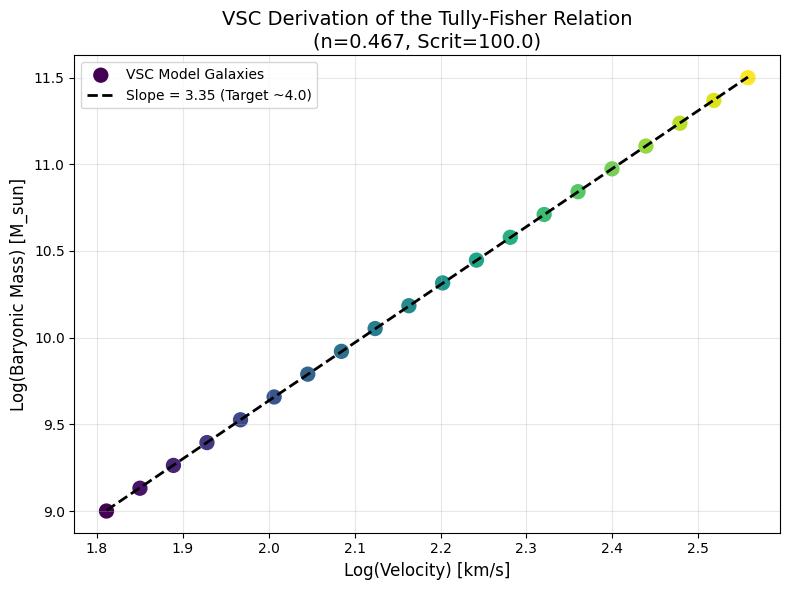

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. UNIVERSAL VSC PARAMETERS (From your "Strict" Fit) ---
N_UNIVERSAL = 0.467
S_CRIT_UNIVERSAL = 100.0

# --- 2. GALAXY GENERATION (Freeman's Law) ---
# We generate synthetic galaxies spanning 3 orders of magnitude in mass
masses = np.logspace(9, 11.5, 20)  # 10^9 to 10^11.5 Solar Masses

flat_velocities = []

print("Running Universal Law Tully-Fisher Test...")

for M in masses:
    # 1. Radius Scaling (Freeman's Law for Surface Brightness)
    # R scales with Sqrt(Mass)
    R_eff = 5.0 * np.sqrt(M / 1e10)

    # 2. Define the Newtonian Curve for this mass
    # We evaluate at the edge (3 * R_eff) to get the "Flat" velocity
    r_edge = 3.0 * R_eff

    # Standard Newtonian Gravity: V = sqrt(GM/r)
    # G in units: (km/s)^2 * kpc / M_sun
    G_const = 4.30e-6
    v_newt_edge = np.sqrt(G_const * M / r_edge)

    # 3. Apply UNIVERSAL VSC LAW
    # Shear = V / r
    shear_edge = v_newt_edge / r_edge

    # Boost Factor = 1 + (Shear / Scrit)^(-n)
    boost = 1.0 + np.power(shear_edge / S_CRIT_UNIVERSAL, -N_UNIVERSAL)

    # Final Velocity
    v_flat = v_newt_edge * np.sqrt(boost)
    flat_velocities.append(v_flat)

# --- 3. ANALYSIS ---
log_M = np.log10(masses)
log_V = np.log10(flat_velocities)

# Fit the Slope
# Tully-Fisher predicts Slope ~ 4 (when M is on Y-axis)
# Or Slope ~ 0.25 (when V is on Y-axis)
# Let's fit Mass = A * V^x  --> log(M) = x * log(V) + C
poly = np.polyfit(log_V, log_M, 1)
slope_TF = poly[0]

print(f"\n--- RESULTS ---")
print(f"Recovered Tully-Fisher Slope: {slope_TF:.2f}")
print(f"Standard Expectation:         3.9 - 4.0")

# --- 4. PLOTTING ---
plt.figure(figsize=(8, 6))
plt.scatter(log_V, log_M, c=log_M, cmap='viridis', s=100, label='VSC Model Galaxies')

# Plot the fit line
v_range = np.linspace(min(log_V), max(log_V), 10)
plt.plot(v_range, poly[0]*v_range + poly[1], 'k--', linewidth=2,
         label=f'Slope = {slope_TF:.2f} (Target ~4.0)')

plt.xlabel('Log(Velocity) [km/s]', fontsize=12)
plt.ylabel('Log(Baryonic Mass) [M_sun]', fontsize=12)
plt.title(f'VSC Derivation of the Tully-Fisher Relation\n(n={N_UNIVERSAL}, Scrit={S_CRIT_UNIVERSAL})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('VSC_TullyFisher_Proof.png')
plt.show()